**21 graphes et cobinatoires de Ramsey**

http://exo7.emath.fr/cours/livre-python1.pdf


**Activité 1** : construire des graphes

Dessine le graphe à partir d'une matrice d'adjacence

// graphe
graph {
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	0 -- 1 [color=red]
	0 -- 2 [color=green]
	0 -- 3 [color=green]
	0 -- 4 [color=red]
	1 -- 2 [color=green]
	1 -- 3 [color=red]
	1 -- 4 [color=green]
	2 -- 3 [color=red]
	2 -- 4 [color=red]
	3 -- 4 [color=green]
}


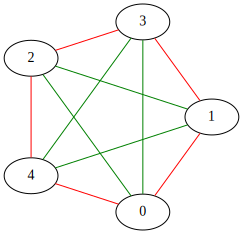

In [64]:
from graphviz import Graph


def dessin_du_graphe(matrice_adjacence):    
    
    '''Dessine le graphe associé à une matrice 
    - graphe simple non orienté
    - la matrice d'ajacence est donc symétrique 
    (https://fr.wikipedia.org/wiki/Graphe_simple)
    '''
    
    n = len(matrice_adjacence) # nombre de sommets
    nodes = [str(i) for i in range(n)]
    
    G = Graph(comment='graphe', engine='circo')
    for i in nodes:
        G.node(i,i) # G.node(nom, label)
    
    for i in range(n-1):
        for j in range(i+1,n):
            if graphe[i][j] == 1:
                G.edge(nodes[i],nodes[j], color='green')
            else:
                G.edge(nodes[i],nodes[j], color='red')
    return G


graphe = [
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0]    
]

G = dessin_du_graphe(graphe)
print(G)

G


Afficher une matrice à partir d'un graphe

In [8]:
def afficher_matrice(graphe):    
    '''Affiche la matrice d un graphe donné '''    
    for ligne in graphe:
        print(ligne)   

graphe = [
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 0]
]

afficher_matrice(graphe)

[0, 1, 1]
[1, 0, 0]
[1, 0, 0]


**Activité 1 et 2** : afficher des jolis graphes; amis et étrangers

Teste si trois sommets i, j, k sont amis ou étrangers et affiche le graphe en conséquence:
    - rouge => étrangers
    - vert => amis

Trois amis :  True
Trois étrangers :  False


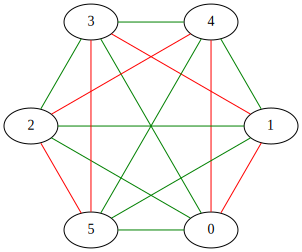

In [9]:
def contient_trois_amis_fixes(graphe,i,j,k):    
    '''Les trois points i,j,k sont ils amis ?'''
    if graphe[i][j] == 1 and graphe[j][k] == 1 and graphe[i][k]== 1:
        return True
    else:
        return False

def contient_trois_etrangers(graphe,i,j,k):    
    '''Les trois points i,j,k sont ils étrangers ?'''    
    if graphe[i][j] == 0 and graphe[j][k] == 0 and graphe[i][k]== 0:
        return True
    else:
        return False

graphe = [
    [0, 0, 1, 1, 0, 1],
    [0, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0]
]
    
trois_amis = contient_trois_amis_fixes(graphe,0,2,3)
print("Trois amis : ",trois_amis)

trois_etrangers = contient_trois_etrangers(graphe, 0,2,3)
print("Trois étrangers : ",trois_etrangers)

dessin_du_graphe(graphe)

**Activité 3** : écriture binaire avec des zéros non significatifs

Conversion d'un nombre en base 10 en un nombre en base 2 en n bits

In [10]:
def decimal_vers_binaire(p,n):
    
    '''Conversion en binaire'''    
    
    nb_binaire = bin(p).replace('0b',"")
    if len(nb_binaire) == n:
        return nb_binaire
    elif len(nb_binaire) < n:
        diff = n - len(nb_binaire)
        chaine = ''
        for i in range(diff) :
            chaine  = '0' + chaine       
        nb_binaire = chaine + nb_binaire
        return list(nb_binaire)    
    
decimal_vers_binaire(37,9)

['0', '0', '0', '1', '0', '0', '1', '0', '1']

**Activité 4** : sous-ensembles 

Donne tous les sous-ensembles de cardinal k fixé d'un ensemble E.

In [51]:
l = 6
E = [i for i in range(0,l)]

def sous_ensembles_fixes(E,k):
    '''Affiche tous les sous-ensembles de E à k elements '''
    liste_sous_ensembles = [] 
    n = len(E)
    for i in range(2**n): 
        chaine_binaire = decimal_vers_binaire(i,n)
        sous_ens_fixe = []
        for j in range(0, n):
            if chaine_binaire[n-j-1] == '1':
                sous_ens_fixe.append(j)                
        if len(sous_ens_fixe) == k:
            liste_sous_ensembles.append(sous_ens_fixe)
    return liste_sous_ensembles

sous_ensembles_fixes(E,3)

[[0, 1, 2],
 [0, 1, 3],
 [0, 2, 3],
 [1, 2, 3],
 [0, 1, 4],
 [0, 2, 4],
 [1, 2, 4],
 [0, 3, 4],
 [1, 3, 4],
 [2, 3, 4],
 [0, 1, 5],
 [0, 2, 5],
 [1, 2, 5],
 [0, 3, 5],
 [1, 3, 5],
 [2, 3, 5],
 [0, 4, 5],
 [1, 4, 5],
 [2, 4, 5],
 [3, 4, 5]]

**Activité 5** : Théorème de Ramsey pour n = 6

Vérifier que tous les graphes ayant 6 sommets contiennent trois amis ou bien trois
étrangers.

conjecture vérifiée pour n = 6

(et non vérifiée pour n = 4 et n = 5)



le graphe contient-il trois amis ou trois étrangers ? :  False


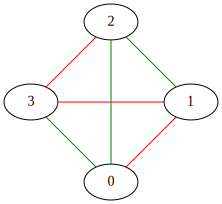

In [74]:
def graphe_contient_trois(graphe):
    '''fonction qui teste si une graphe contient trois amis ou trois étrangers'''
    liste = sous_ensembles_fixes(graphe,3)
    for i in range(len(liste)):
        if contient_trois_amis_fixes(graphe,liste[i][0], liste[i][1], liste[i][2]) \
                or contient_trois_etrangers(graphe, liste[i][0], liste[i][1], liste[i][2]):
            return True
        
    return False

matrice = [
    [1, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
]

print("le graphe contient-il trois amis ou trois étrangers ? : ",graphe_contient_trois(matrice))
dessin_du_graphe(matrice)


In [85]:
import numpy
import time

def voir_tous_graphes(n):    
    ''' Trouve tous les graphes à n sommets (il y en a 2**N avec N = n(n-1)/2) '''        
    liste_matrices = []
    N = int(n*(n-1)/2)
    for i in range (2**N):
        liste_binaire = list(decimal_vers_binaire(i,N))
        matrice = numpy.zeros(shape=(n,n))
        for j in range(0,n):
            for i in range(j+1,n):
                b = liste_binaire.pop()
                matrice[i][j] = b
                matrice[j][i] = b
        liste_matrices.append(matrice)
    return liste_matrices

def test_tous_graphes(n):
    ''' s'ils contiennent tous au moins
    3 amis et trois étrangers, si pas le cas retourne False'''
    tous_graphes = voir_tous_graphes(n)
    for m in tous_graphes:
        if graphe_contient_trois(m) == False:
            return m,False
    return [], True
    

start = time.time()

n = 6
matrice, conjecture_verifiee = test_tous_graphes(n)

end = time.time()

print("temps d'exécution : ", end - start)


if conjecture_verifiee:
    print("la conjecture est vérifiée pour n = ", n)
else:
    print("la conjecture n'est pas vérifiée  pour n = ", n)
    print("une matrice pour laquelle la conjecture n'est pas vérifiée : ")

dessin_du_graphe(matrice)




temps d'exécution :  6.266752481460571
la conjecture est vérifiée pour n =  6
